# Brazilian E-Commerce Public Dataset by Olist

In [1]:
# Libraries

import pandas as pd
import datetime

In [2]:
# Data

df_customers = pd.DataFrame(pd.read_csv('olist_customers_dataset.csv'))

df_order_items = pd.DataFrame(pd.read_csv('olist_order_items_dataset.csv'))

df_order_payments = pd.DataFrame(pd.read_csv('olist_order_payments_dataset.csv'))

df_order_reviews = pd.DataFrame(pd.read_csv('olist_order_reviews_dataset.csv'))

df_orders = pd.DataFrame(pd.read_csv('olist_orders_dataset.csv'))

df_products = pd.DataFrame(pd.read_csv('olist_products_dataset.csv'))

df_sellers = pd.DataFrame(pd.read_csv('olist_sellers_dataset.csv'))

df_categories = pd.DataFrame(pd.read_csv('product_category_name_translation.csv'))

In [3]:
df_categories

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [4]:
# Columns for analysis


# df_orders --> order_id, customer_id, order_status, order_purchase_timestamp, order_delivered_customer_date, order_estimated_delivery_date
# df_order_items --> order_id, order_item_id, product_id
# df_products --> product_id, product_category_name, 
# df_categories --> product_category_name, product_category_name_english
# df_customers --> customer_id, customer_city, customer_state


# df_order_payments --> order_id, payment_type, payment_installments, payment_value
# df_order_reviews --> order_id, review_score
# df_sellers --> seller_id, seller_city, seller_state


## Preparing the data

In [5]:
# Merging the datasets

df1 = df_orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']].merge(df_order_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], on='order_id').merge(df_products[['product_id', 'product_category_name']], on='product_id')
df1 = df1.merge(df_categories, on='product_category_name', how='left')
df1 = df1.merge(df_customers[['customer_id', 'customer_city', 'customer_state']])
df1 = df1.merge(df_sellers[['seller_id', 'seller_city', 'seller_state']])

df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,customer_city,customer_state,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,housewares,sao paulo,SP,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,housewares,sao paulo,SP,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,housewares,sao paulo,SP,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,utilidades_domesticas,housewares,florianopolis,SC,maua,SP
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-16 19:03:36,2017-08-23 00:00:00,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,bebes,baby,itaquaquecetuba,SP,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-09 15:06:57,2018-07-20 00:00:00,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,79.00,14.13,construcao_ferramentas_iluminacao,construction_tools_lights,ferraz de vasconcelos,SP,porto ferreira,SP
112646,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,NaN,2017-03-30 00:00:00,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,19.70,10.96,automotivo,auto,gaspar,SC,blumenau,SC
112647,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-08-02 22:47:35,2018-08-16 00:00:00,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,399.00,45.07,moveis_decoracao,furniture_decor,fortaleza,CE,americana,SP
112648,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-06-12 23:11:29,2018-06-08 00:00:00,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,219.90,24.12,moveis_decoracao,furniture_decor,teofilo otoni,MG,sao paulo,SP


## Data Analysis - Selling

### Top 5 selling product categories

In [6]:
# verifying if there are null values on categories columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  112650 non-null  object 
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  product_category_name          111047 non-null  object 
 11  product_category_name_english  111023 non-null  object 
 12  customer_city                 

In [7]:
# making a copy of the dataset
df1_categories = df1.copy()

In [8]:
# filling the null categories values with 'others'
df1_categories.update(df1['product_category_name_english'].fillna('others'))

In [9]:
# checking
df1_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  112650 non-null  object 
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  product_category_name          111047 non-null  object 
 11  product_category_name_english  112650 non-null  object 
 12  customer_city                 

In [17]:
# creating a list of top 5 selling categories
categories = df1_categories['product_category_name_english'].value_counts()
top5_categories = categories.sort_values(ascending=False).nlargest(5)

# creating a list of top 5 selling categories values
top5_categories.values

# getting the minimum value as the reference
ref1 = top5_categories.values.min()

# grouping the non-top5 categories in 'others' list
others = []
for category in categories.index:
    if categories[category] < ref1:
        others.append(category)

# changing the values on dataframe
for i in others:
    df1_categories.loc[df1_categories['product_category_name_english'] == i,'product_category_name_english'] = 'others' 

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: product_category_name_english, dtype: int64

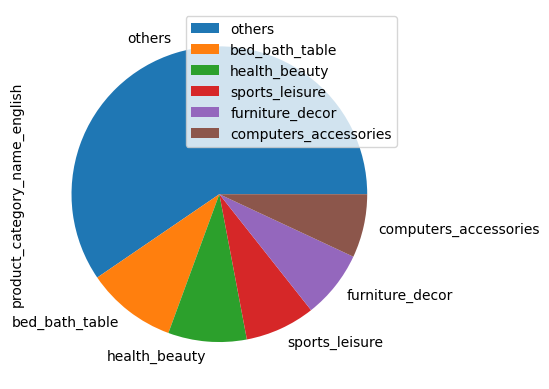

In [54]:

pie_chart = df1_categories['product_category_name_english'].value_counts().plot.pie().legend()

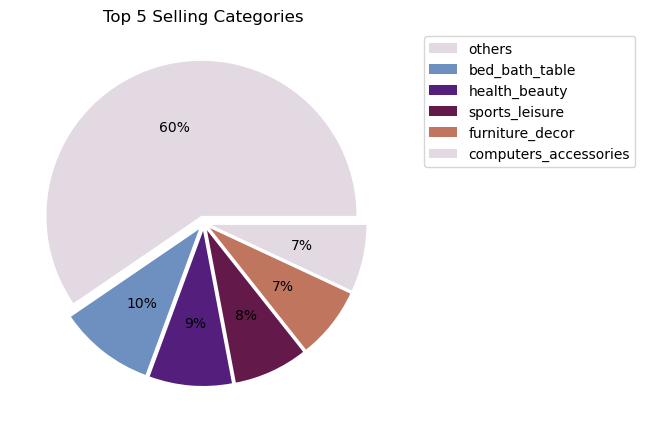

In [64]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
pie_chart = df1_categories['product_category_name_english'].value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode, \
                                                                    figsize=(5, 6), labeldistance=None, \
                                                                    label='', cmap='twilight', title="Top 5 Selling Categories")
pie_chart.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

### 5 States with more customers

In [21]:
top5_customerstates = df1['customer_state'].value_counts().nlargest(5)
top5_customerstates

SP    47449
RJ    14579
MG    13129
RS     6235
PR     5740
Name: customer_state, dtype: int64

### 5 States with less customers

In [22]:
top5_customerstates = df1['customer_state'].value_counts().nsmallest(5)
top5_customerstates

RR     52
AP     82
AC     92
AM    165
RO    278
Name: customer_state, dtype: int64

In [65]:
df2 = df1.groupby(['customer_state', 'product_category_name_english'])[['order_id']].count()
df2

order_id
customer_state product_category_name_english          
AC             auto                                  4
               baby                                  3
               bed_bath_table                        4
               books_general_interest                2
               christmas_supplies                    1
...                                                ...
TO             sports_leisure                       25
               stationery                            3
               telephony                            21
               toys                                 13
               watches_gifts                        30

[1356 rows x 1 columns]